# Read from pickles

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : January 13th  2022


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [3]:
import pickle

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [7]:
string_date

'2022-02-19'

In [8]:
from iminuit import Minuit
import iminuit

In [9]:
iminuit.__version__

'2.7.0'

In [10]:
from astropy.io import fits
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [11]:
from time import sleep

In [12]:
from astropy.time import Time
import astropy.units as u

# Function

In [13]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^holo4_003_.*_(.*)_quickLookExp.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None

def file_target(filename):
    m = re.findall('^holo4_003_.*_(.*)_.*_.*_quickLookExp$', filename)
    if len(m)>0:
        return m[0]
    else:
        return None

In [14]:
def file_tag_forsorting_ronchi(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^ronchi170lpmm_.*_(.*)_quickLookExp.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None

def file_target_ronchi(filename):
    m = re.findall('^ronchi170lpmm_.*_(.*)_.*_.*_quickLookExp$', filename)
    if len(m)>0:
        return m[0]
    else:
        return None

# Config

In [15]:
DATE="2021-07-07"
DATE2="2021_07_07"

In [16]:
version="v4.0"

# Path

In [17]:
inputfilename="./data/holo-scan-auxtel.pickle"

# Read file

In [18]:
with open(inputfilename, 'rb') as pickle_file:
    data_dict = pickle.load(pickle_file)

In [19]:
# data_dict.keys()

In [20]:
list_of_filenames = sorted(data_dict.keys())

In [21]:
# data_dict.values()

In [22]:
#for item in data_dict.items():
#...     print(item)

In [23]:
item = data_dict[list_of_filenames[0]]

In [24]:
len(item['all_lambdas'])

914

In [25]:
len(item['all_fluxes'])

914

In [26]:
N=len(list_of_filenames)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

 bad holo4_003_empty_HD160617_20210707_000276_quickLookExp_spectrum.fits
 bad holo4_003_empty_HD160617_20210707_000284_quickLookExp_spectrum.fits
 bad holo4_003_empty_HD160617_20210707_000289_quickLookExp_spectrum.fits
 bad holo4_003_empty_HD160617_20210707_000291_quickLookExp_spectrum.fits


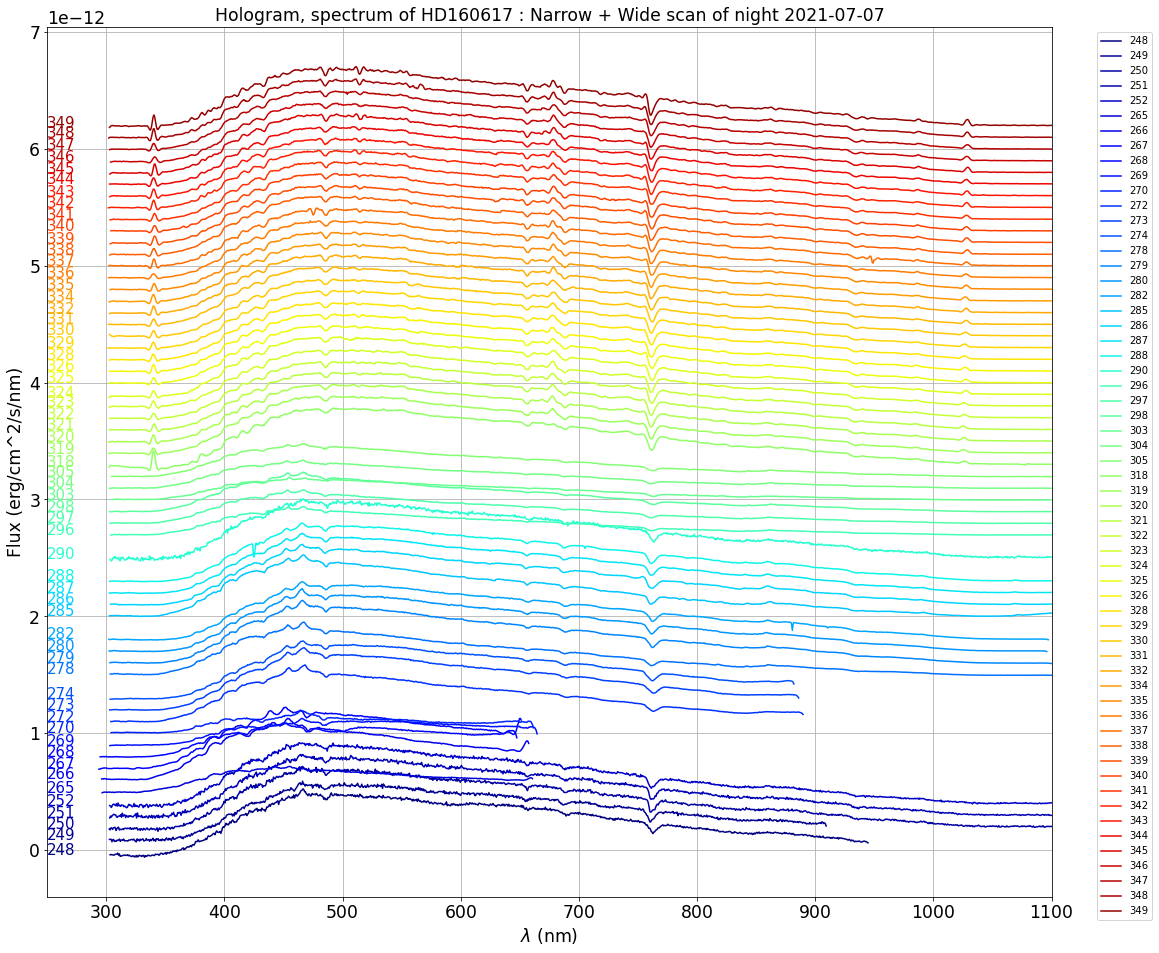

In [27]:
fig=plt.figure(figsize=(18,16))
ax=fig.add_subplot(1,1,1)

idx=0
for filename in list_of_filenames:
    
         
    item  = data_dict[filename]
    lambdas = np.array(item['all_lambdas'])
    fluxes  = np.array(item['all_fluxes'])
    label = int(item['number'])
    
    
    
    delta=idx*1.0e-13
    #delta=0
    
    if len(lambdas) == len(fluxes) and label not in [284, 276, 289, 291] :
        try:
            ax.plot(lambdas,fluxes+delta,label=label,color=all_colors[idx])
            ax.text(250.,fluxes[0]+delta, f'{label}',color=all_colors[idx],fontsize=15)
        except TypeError:
            pass
    else:
        print(f" bad {filename}")
    
    idx+=1
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("Flux (erg/cm^2/s/nm)")
ax.set_xlim(250.,1100)
ax.grid()
ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
ax.set_title("Hologram, spectrum of HD160617 : Narrow + Wide scan of night 2021-07-07")
plt.show()
    

# Collect in array

## Full scan

In [28]:
idx=0
all_num = []
all_lambdas = []
all_data = []
all_X = []
all_Y = []
all_alpha = []



for filename in list_of_filenames: 
    
    item    = data_dict[filename]
    lambdas = np.array(item['all_lambdas'])
    fluxes  = np.array(item['all_fluxes'])
    number  = int(item['number'])
    xpos    = item['targetx_pix']
    ypos    = item['targety_pix']
    alpha   = item['rotangle']
  
    all_num.append(number)
    all_lambdas.append(lambdas) 
    all_data.append(fluxes)
    all_X.append(xpos)
    all_Y.append(ypos)
    all_alpha.append(alpha)
    
    idx+=1

## Narrow scan dataset

In [29]:
idx=0
all_num_nr = []
all_lambdas_nr = []
all_data_nr = []
all_X_nr = []
all_Y_nr = []
all_alpha_nr = []

for filename in list_of_filenames: 
    
    item    = data_dict[filename]
    lambdas = np.array(item['all_lambdas'])
    fluxes  = np.array(item['all_fluxes'])
    number  = int(item['number'])
    xpos    = item['targetx_pix']
    ypos    = item['targety_pix']
    alpha   = item['rotangle']
    
    if number >= 317:
        all_num_nr.append(number)
        all_lambdas_nr.append(lambdas) 
        all_data_nr.append(fluxes)
        all_X_nr.append(xpos)
        all_Y_nr.append(ypos)
        all_alpha_nr.append(alpha)
        
    idx+=1
        

# Position

In [30]:
def plotScanPosition(X,Y,tag,xlims=(0,4000),ylims=(0,4000),flag_annotate=True,figsize=(8,8),title=""):
    """
    """
    
    NN=len(X)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    
    plt.figure(figsize=figsize)
    
    sc = plt.scatter(X, Y, s=200, c=all_colors, cmap="seismic")
    #cb=plt.colorbar(sc)
    #cb.ax.set_ylabel('rotation angle (deg)')

    
    if flag_annotate:
        K=len(tag)
        for idx in range(K):
            plt.annotate(tag[idx],xy=(X[idx],Y[idx]), color="k", ha='center',va='top',fontsize=15)
            #plt.annotate(tag[idx],xy=(X[idx],Y[idx]), color="k",fontsize=10)
            #plt.text(X[idx],Y[idx],tag[idx],  horizontalalignment='center',verticalalignment='top',color="k",fontsize=10)
        
    
    plt.xlim(xlims)  
    plt.ylim(ylims)  
    
    
    plt.xlabel("X (pix)")
    plt.ylabel("Y (pix)")
    plt.grid()
    axes=plt.gca()
    axes.set_aspect('equal')
    
    plt.title(title)
    plt.tight_layout()
    
    plt.show()
            

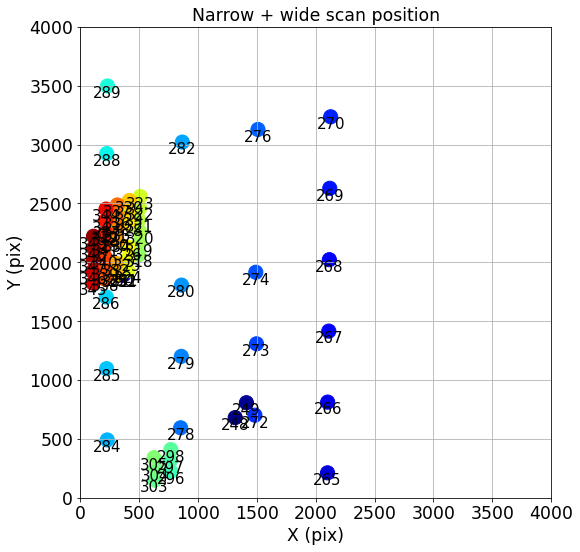

In [31]:
plotScanPosition(all_X,all_Y,all_num,xlims=(0,4000),ylims=(0,4000),title="Narrow + wide scan position")

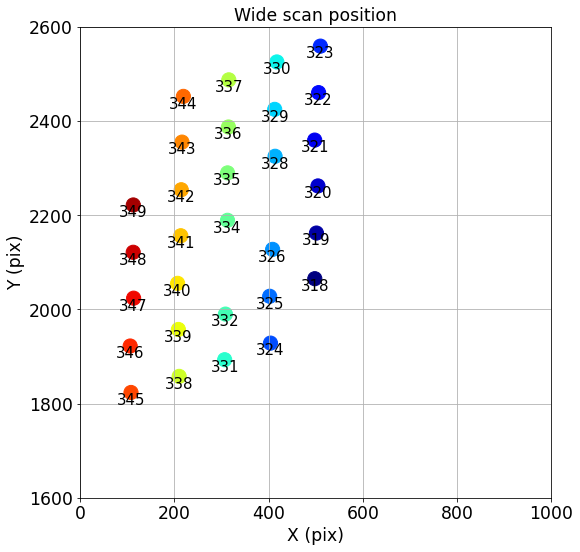

In [32]:
plotScanPosition(all_X_nr,all_Y_nr,all_num_nr,xlims=(0,1000),ylims=(1600,2600),title="Wide scan position")

# Spectra

In [33]:
def PlotSpectra(all_wl,all_spec,all_tag,delta=0, 
                thetitle="Hologram, spectrum of HD160617 : Narrow  scan of night 2021-07-07", 
                thexlabel="$\\lambda$ (nm)",theylabel="Flux (erg/cm^2/s/nm)",figsize=(14,8)):
    """
    """
    
    NN=len(all_wl)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_subplot(1,1,1)
    
    idx=0
    for idx in range(NN):
        
        label=all_tag[idx]
        ax.plot(all_wl[idx],all_spec[idx]+delta,label=label,color=all_colors[idx])
        if delta !=0:
            plt.text(250.,all_spec[idx][0]+delta, f'{label}',color=all_colors[idx],fontsize=10)
        
    ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(250.,1100)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title(thetitle)
    plt.show()
        
    
    

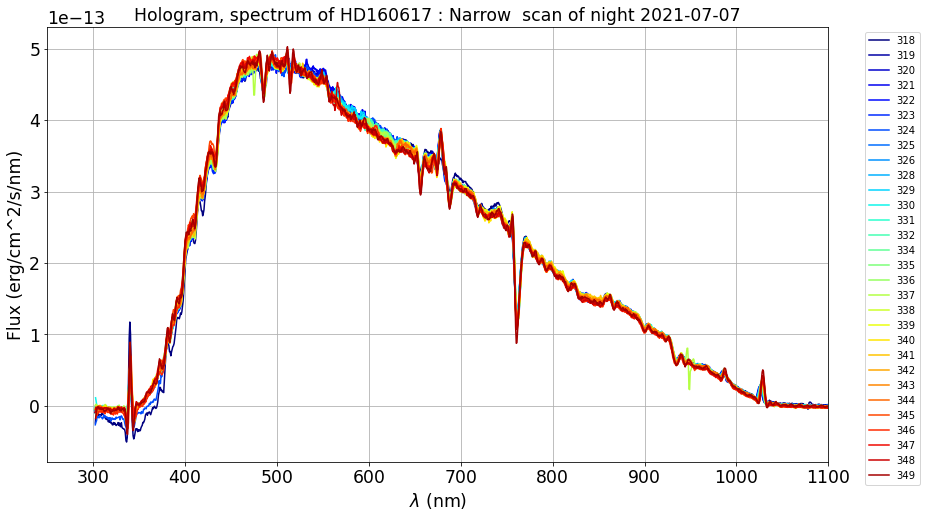

In [34]:
PlotSpectra(all_lambdas_nr,all_data_nr,all_num_nr)

In [35]:
idx0 = np.where(np.array(all_num) == 335)[0][0]
idx0

48

In [36]:
idx0_nr = np.where(np.array(all_num_nr) == 335)[0][0]
idx0_nr

15

In [37]:
idx_ref=idx0_nr

In [38]:
from scipy.signal import savgol_filter

In [39]:
wl=np.arange(380,1000)

In [40]:
ref=np.interp(wl, all_lambdas[idx_ref],all_data[idx_ref])

In [41]:
yhat = savgol_filter(ref, 11, 3) # window size 51, polynomial order 3

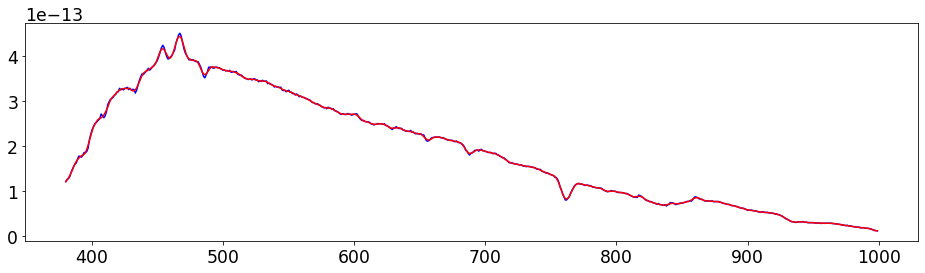

In [42]:
plt.plot(wl,ref,'b-')
plt.plot(wl,yhat,'r-')

In [43]:
def PlotFilteredRatio(all_wl,all_spec,all_tag,idx_ref,window=11, 
                thetitle="Hologram, spectrum of HD160617 : Spectrum ratio Narrow  scan of night 2021-07-07", 
                thexlabel="$\\lambda$ (nm)",theylabel="spectrum ratio",figsize=(14,8),percent=5.0):
    """
    """
    
    NN=len(all_wl)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    wl=np.arange(380,1000)
   
    # filter    
    ref_filt = savgol_filter(all_spec[idx_ref], window, 3) # window size 11, polynomial order 3
    # interpolate
    ref_int= np.interp(wl, all_wl[idx_ref],ref_filt)
    
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_subplot(1,1,1)
    
    idx=0
    for idx in range(NN):
        
        label=all_tag[idx]
        
        spec_filt = savgol_filter(all_spec[idx], window, 3) # window size 11, polynomial order 3
        spec_int = np.interp(wl, all_wl[idx],spec_filt)
        
        ratiof = spec_int/ref_int
        
        ax.plot(wl,ratiof,label=label,color=all_colors[idx])
       
    
    ax.hlines(y=1+percent/100., xmin=wl[0], xmax=wl[-1], linewidth=2, linestyles='dashed',color='k')
    ax.hlines(y=1-percent/100., xmin=wl[0], xmax=wl[-1], linewidth=2, linestyles='dashed',color='k')
    
    ax.set_xlabel(thexlabel)
    ax.set_ylabel(theylabel)
    ax.set_xlim(380.,1000)
    ax.set_ylim(0.9,1.1)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.04, 1), prop={'size': 10}, loc='upper left')
    ax.set_title(thetitle)
    plt.show()
    

In [44]:
refnum=all_num_nr[idx_ref]
thetitle=f"Hologram, target HD160617 : spectrum ratio , narrow scan , night 2021-07-07, ref {refnum}"

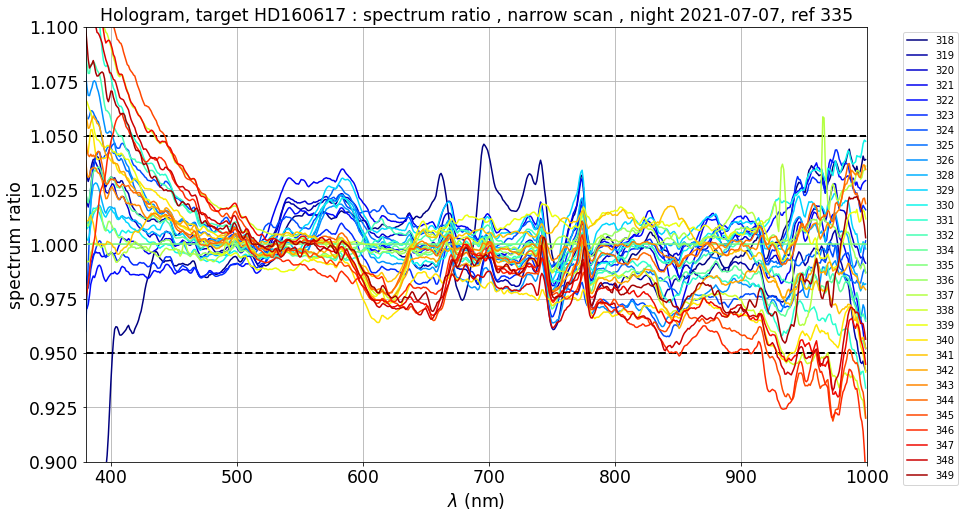

In [45]:
PlotFilteredRatio(all_lambdas_nr,all_data_nr,all_num_nr,idx_ref,window=51,thetitle=thetitle)

### Select a ring around the reference

In [46]:
all_num_nr=np.array(all_num_nr)

In [47]:
ring_num = np.array([335, 328, 329, 334, 336, 341, 342, 343])
ring_num

array([335, 328, 329, 334, 336, 341, 342, 343])

In [48]:
indexes_ring=[ np.where(all_num_nr==idx)[0][0] for idx in  ring_num]

In [49]:
indexes_ring

[15, 9, 10, 14, 16, 21, 22, 23]

In [50]:
all_lambdas_ring=[all_lambdas_nr[idx] for idx in indexes_ring]
all_data_ring =  [all_data_nr[idx] for idx in indexes_ring]
all_num_ring = [all_num_nr[idx] for idx in indexes_ring]

In [51]:
all_num_ring

[335, 328, 329, 334, 336, 341, 342, 343]

In [52]:
idx_ref=0
refnum=all_num_ring[idx_ref]
#refnum=ring_num[idx_ref]
thetitle=f"Hologram, target HD160617 : central ring , night 2021-07-07, ref {refnum}"

In [53]:
thetitle

'Hologram, target HD160617 : central ring , night 2021-07-07, ref 335'

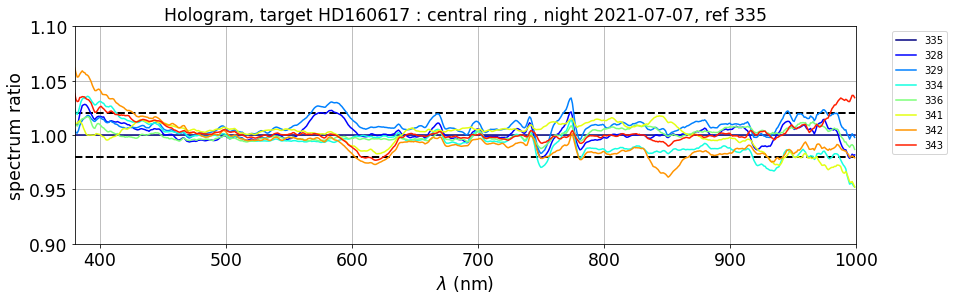

In [54]:
PlotFilteredRatio(all_lambdas_ring,all_data_ring,all_num_ring,idx_ref,window=51,thetitle=thetitle,figsize=(14,4),percent=2)